In [32]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Customer Loyalty History.csv")

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


### Check for Missing Values

In [33]:
# Count missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


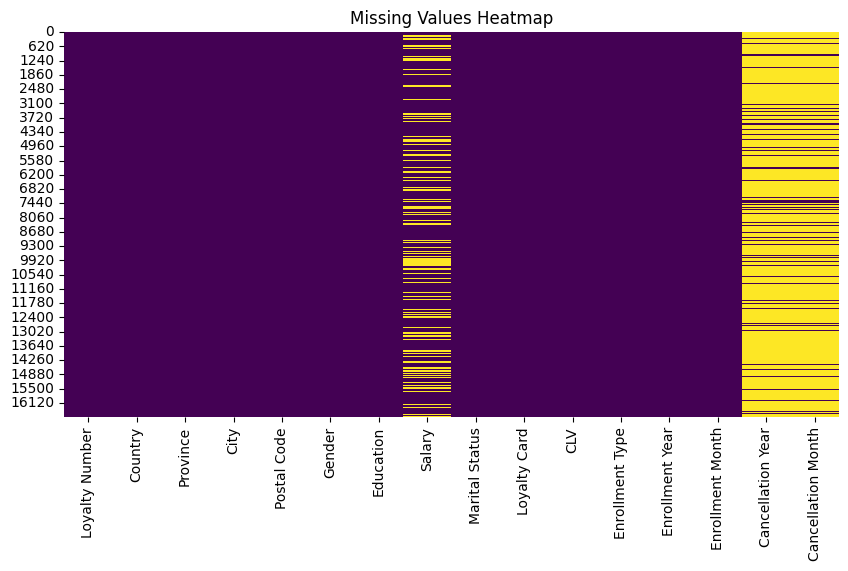

In [34]:
# Visualize missing values
plt.figure(figsize = (10, 5))
sns.heatmap(df.isnull(), cbar = False, cmap = "viridis")
plt.title("Missing Values Heatmap")
plt.show()

### Handling Missing Values

In [35]:
# Calculate missing value percentages
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
missing_percent

Cancellation Year     87.650117
Cancellation Month    87.650117
Salary                25.321145
dtype: float64

### Handling Missing Values by Column

In [36]:
# Drop columns with too many missing values
df.drop(columns=["Cancellation Year", "Cancellation Month"], inplace = True)

In [37]:
# Fill missing salary values with the median
df["Salary"].fillna(df["Salary"], inplace = True)

In [38]:
df.isnull().sum()

Loyalty Number         0
Country                0
Province               0
City                   0
Postal Code            0
Gender                 0
Education              0
Salary              4238
Marital Status         0
Loyalty Card           0
CLV                    0
Enrollment Type        0
Enrollment Year        0
Enrollment Month       0
dtype: int64

### Summary Statistics

In [39]:
# Summary statistics for numerical columns
df.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000


### Visualizing Key Features

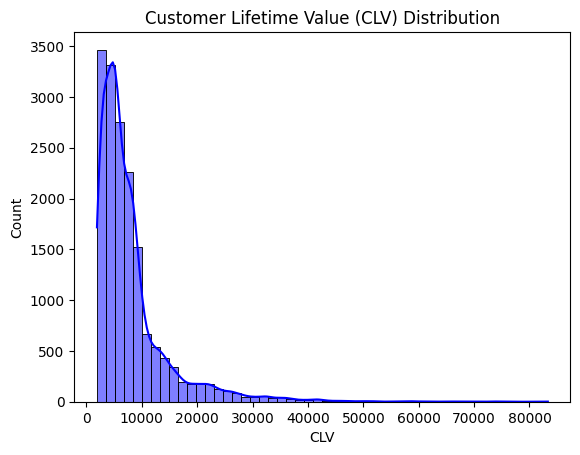

In [40]:
sns.histplot(df["CLV"], bins = 50, kde = True, color = "blue")
plt.title("Customer Lifetime Value (CLV) Distribution")
plt.show()

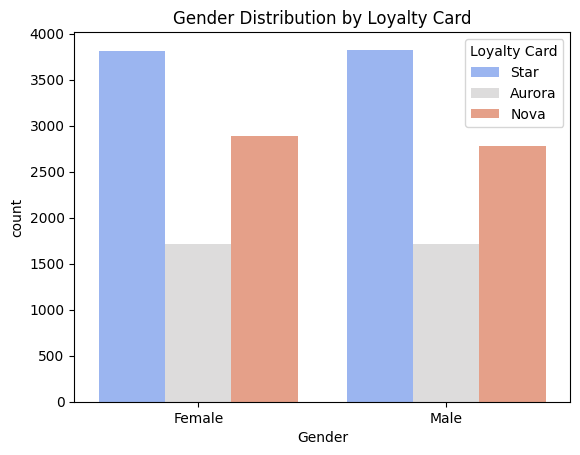

In [41]:
# Gender Distribution with loyalty Card Type
sns.countplot(x = "Gender", data = df, hue = "Loyalty Card", palette = "coolwarm")
plt.title("Gender Distribution by Loyalty Card")
plt.show()

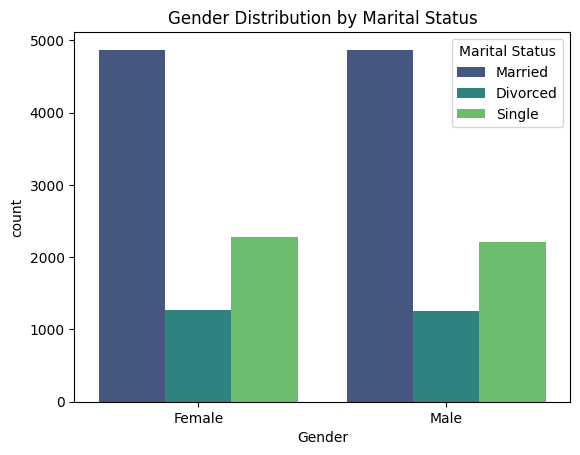

In [42]:
# Gender Distribution with Marital Status
sns.countplot(x = "Gender", data = df, hue = "Marital Status", palette = "viridis")
plt.title("Gender Distribution by Marital Status")
plt.show()

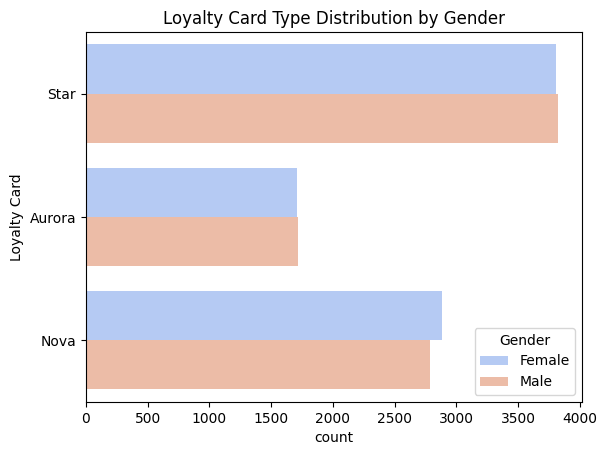

In [43]:
# Loyalty Card Type Distribution by Gender
sns.countplot(y = "Loyalty Card", data = df, hue = "Gender", palette = "coolwarm")
plt.title("Loyalty Card Type Distribution by Gender")
plt.show()

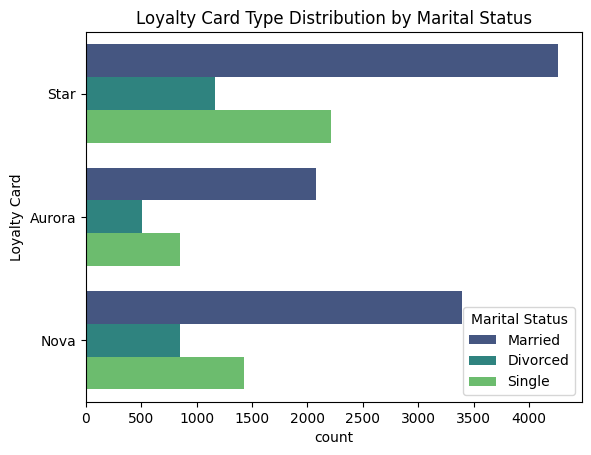

In [44]:
# Loyalty Card Type Distribution by Marital Status
sns.countplot(y = "Loyalty Card", data = df, hue = "Marital Status", palette = "viridis")
plt.title("Loyalty Card Type Distribution by Marital Status")
plt.show()

<Axes: xlabel='Salary'>

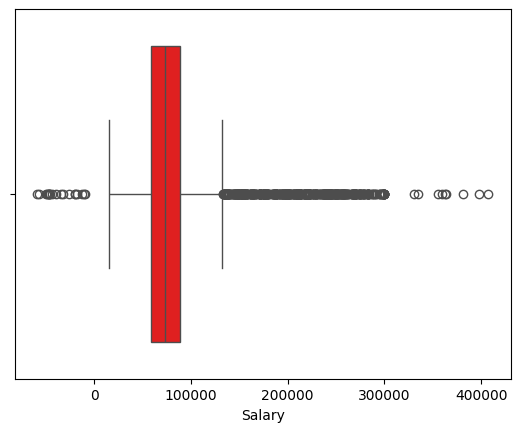

In [45]:
sns.boxplot(x = df["Salary"], color = "red")


### Relationship Between Salary and CLV

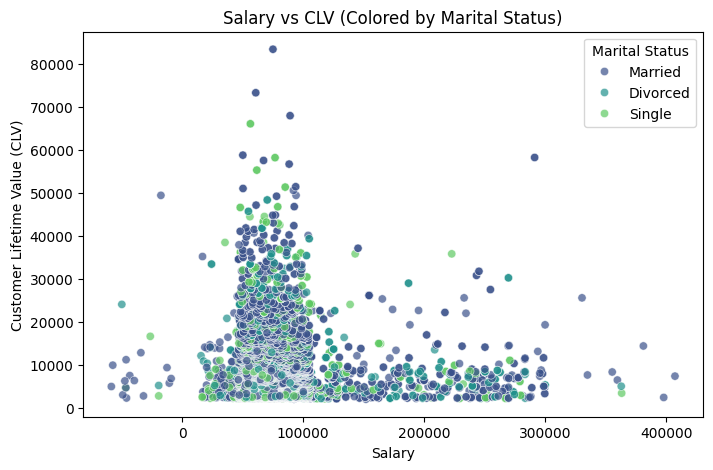

In [46]:
# Scatter Plot: Salary vs. CLV(Colored by Marital Status)
plt.figure(figsize = (8, 5))
sns.scatterplot(x = df["Salary"], y = df["CLV"], hue = df["Marital Status"], palette = "viridis", alpha = 0.7)
plt.title("Salary vs CLV (Colored by Marital Status)")
plt.xlabel("Salary")
plt.ylabel("Customer Lifetime Value (CLV)")
plt.show()

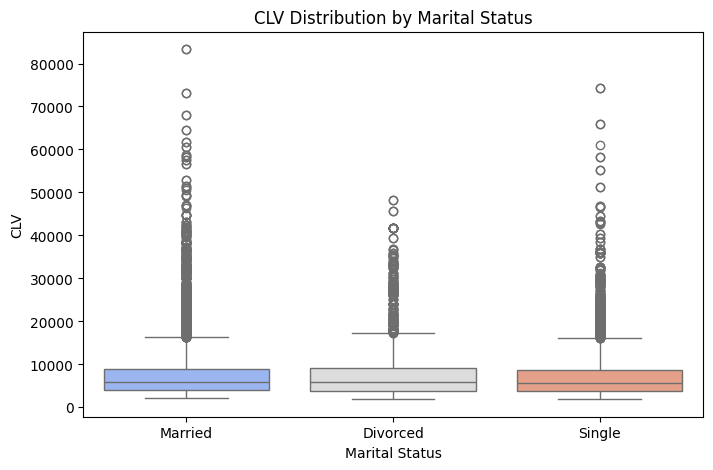

In [47]:
# Boxplot: CLV Distribution by Marital Status
plt.figure(figsize = (8, 5))
sns.boxplot(x = "Marital Status", y = "CLV", data = df, hue = df["Marital Status"], palette = "coolwarm")
plt.title("CLV Distribution by Marital Status")
plt.show()

### Correlation Analysis

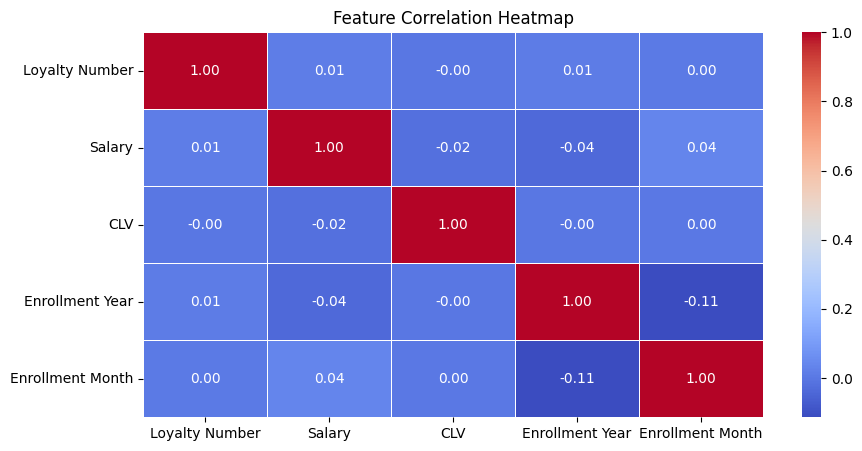

In [48]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include = ["number"])

# Generate the correlation heatmap
plt.figure(figsize = (10, 5))
sns.heatmap(numeric_df.corr(), annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

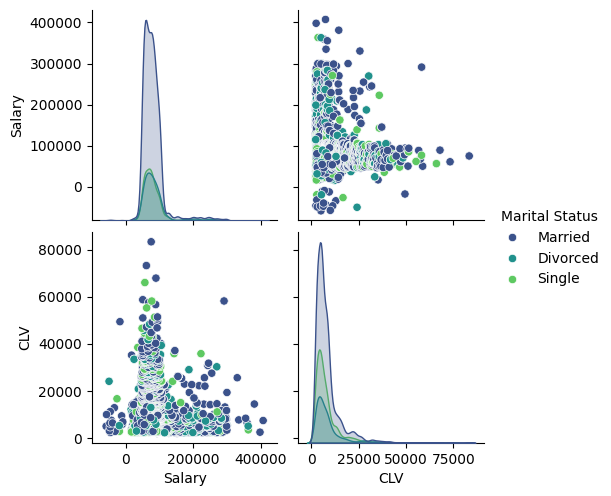

In [49]:
# Pairplot for Salary and CLV, colored by Marital Status
sns.pairplot(df, vars = ["Salary", "CLV"], hue = "Marital Status", palette = "viridis")
plt.show()

### Customer Segmentation with K-Means

In [52]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = df[["CLV", "Salary"]]

# Standardize the features (important for K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Convert back to DataFrame for better readability
scaled_df = pd.DataFrame(scaled_features, columns = ["CLV", "Salary"])
scaled_df.head()

,CLV,Salary
0,-0.604852,0.113989
1,-0.604784,NaN
2,-0.604763,NaN
3,-0.604763,NaN
4,-0.604320,0.692703


In [55]:
print(df[["CLV", "Salary"]].isnull().sum())

CLV          0
Salary    4238
dtype: int64


In [57]:
df["CLV"].fillna(df["CLV"], inplace = True)
df["Salary"].fillna(df["Salary"], inplace = True)

In [58]:
df.dropna(subset = ["CLV", "Salary"], inplace = True)

In [60]:
print(df[["CLV", "Salary"]].isnull().sum())

CLV       0
Salary    0
dtype: int64


In [61]:
df["CLV"] = pd.to_numeric(df["CLV"], errors = "coerce")
df["Salary"] = pd.to_numeric(df["Salary"], errors = "coerce")

In [65]:
df.fillna(df["CLV"], inplace = True)
df.fillna(df["Salary"], inplace = True)

Any NaNs in scaled features? 0


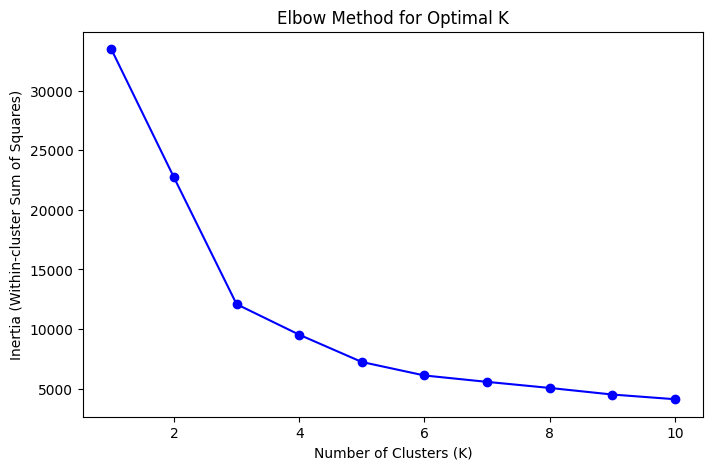

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select and standardize numerical features
features = df[["CLV", "Salary"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Verify there are no NaN values after scaling
import numpy as np
print("Any NaNs in scaled features?", np.isnan(scaled_features).sum())

# Find optimal K using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_) 

# Plot Elbow Curve
plt.figure(figsize = (8, 5))
plt.plot(K_range, inertia, marker = "o", linestyle = "-", color = "b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [67]:
# Apply K-Means
optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Show first few rows with cluster assignnments
df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cluster
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,0
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,73455.0,Single,Star,3839.75,Standard,2014,7,0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,73455.0,Single,Star,3839.75,Standard,2013,2,0
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0


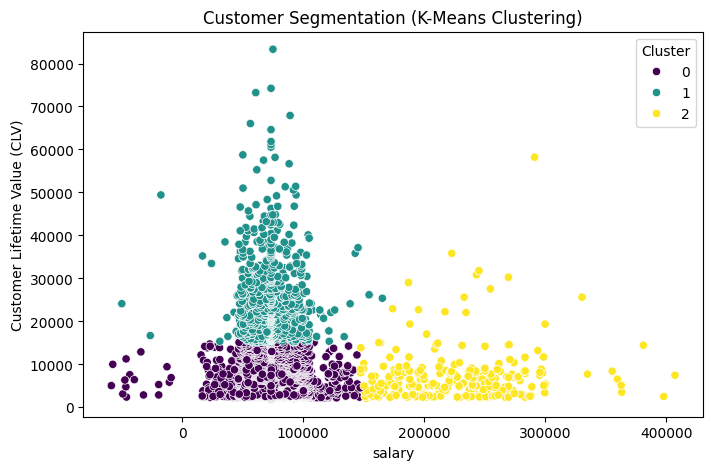

In [68]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = df["Salary"], y = df["CLV"], hue = df["Cluster"], palette = "viridis")
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("salary")
plt.ylabel("Customer Lifetime Value (CLV)")
plt.show()

In [70]:
# Summary Statistics for Each Cluster
df.groupby("Cluster")[["CLV", "Salary"]].mean()

,CLV,Salary
Cluster,,
0,6145.008709,73598.268951
1,24288.377730,73672.232378
2,7179.154186,221283.511628


In [78]:
print(df.columns)

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cluster'],
      dtype='object')


In [73]:
# Analysing Cluster Distributions by Categorical Features

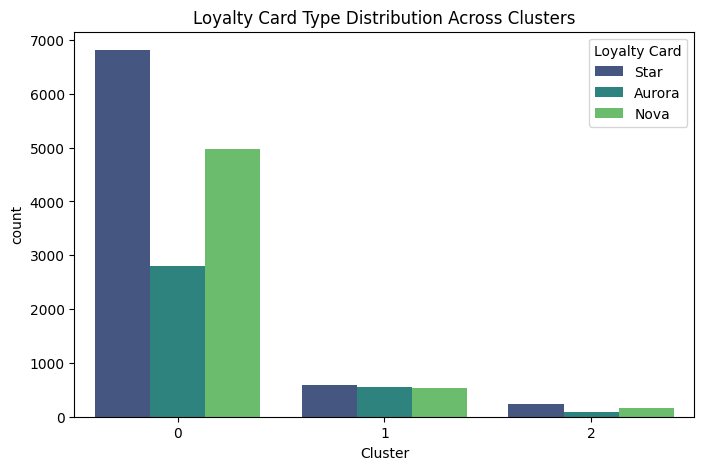

In [79]:
# Checking how Loyalty Card Type is distributed across clusters
plt.figure(figsize = (8, 5))
sns.countplot(x = df["Cluster"], hue = df["Loyalty Card"], palette = "viridis")
plt.title("Loyalty Card Type Distribution Across Clusters")
plt.show()

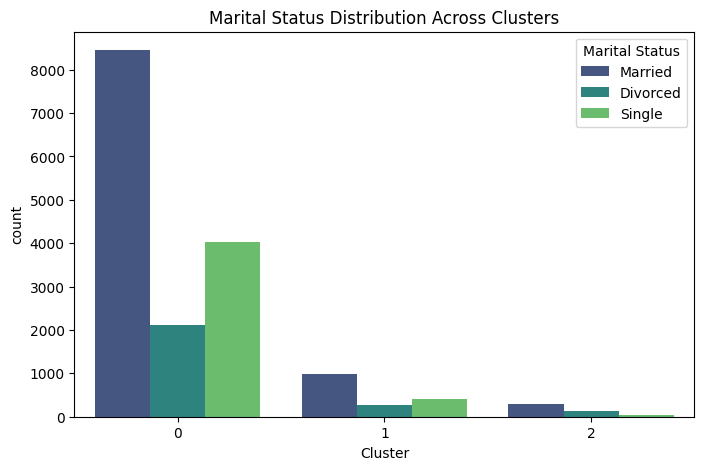

In [80]:
# Checking how Marital Status is distributed across clusters
plt.figure(figsize = (8, 5))
sns.countplot(x = df["Cluster"], hue = df["Marital Status"], palette = "viridis")
plt.title("Marital Status Distribution Across Clusters")
plt.show()